# Correlation and Regression in R
 
> describe relationships between two numerical quantities and characterize these relationships graphically.

- author: Victor Omondi
- toc: true
- comments: true
- categories: [correlation, regression]
- image: images/corr-reg-shield.png

# Overview

Ultimately, data analysis is about understanding relationships among variables. Exploring data with multiple variables requires new, more complex tools, but enables a richer set of comparisons. We will describe relationships between two numerical quantities. We will characterize these relationships graphically, in the form of summary statistics, and through simple linear regression models.


# Libraries

In [52]:
library(ggplot2)
library(openintro)
library(dplyr)
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

# Visualizing two variables

The techniques for exploring bivariate relationships.

## Visualizing bivariate relationships

> ### Bivariate  relationships
- Both variables are numerical 
- Response variable 
  - a.k.a. y, dependent
- Explanatory variable 
  - Something you think might be related to the response 
  - a.k.a. x, independent, predictor

> ### Graphical representations
- Put response on vertical axis 
- Put explanatory on horizontal axis


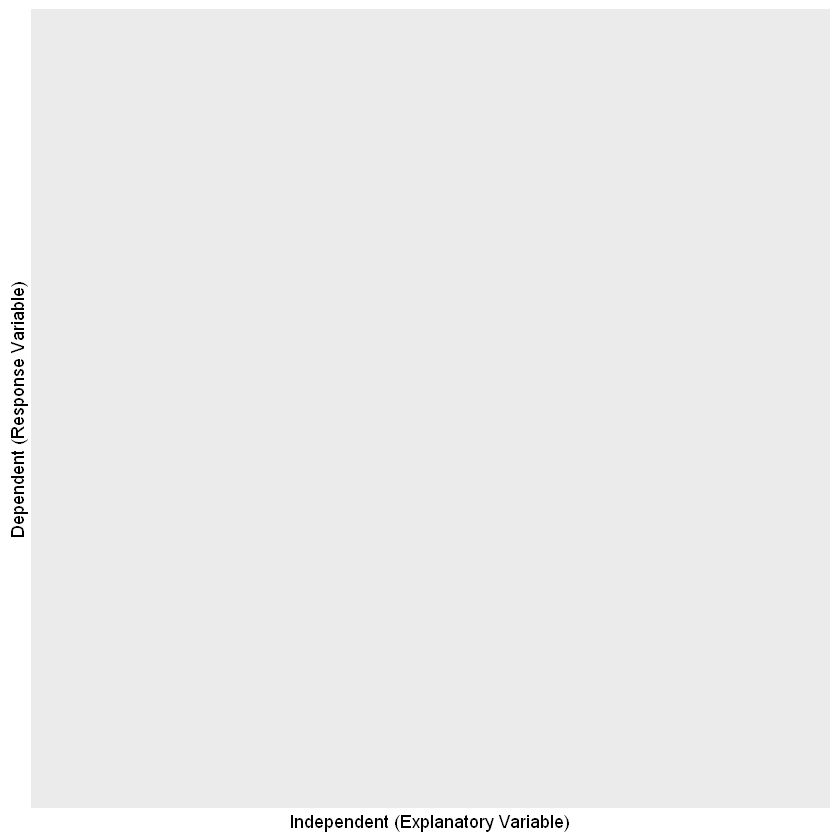

In [5]:
ggplot()+
    geom_line()+
    xlab("Independent (Explanatory Variable)") +
    ylab("Dependent (Response Variable)")

In [10]:
head(possum)

site,pop,sex,age,head_l,skull_w,total_l,tail_l
1,Vic,m,8,94.1,60.4,89.0,36.0
1,Vic,f,6,92.5,57.6,91.5,36.5
1,Vic,f,6,94.0,60.0,95.5,39.0
1,Vic,f,6,93.2,57.1,92.0,38.0
1,Vic,f,2,91.5,56.3,85.5,36.0
1,Vic,f,1,93.1,54.8,90.5,35.5


### Scatterplot

Scatterplots are the most common and effective tools for visualizing the relationship between two numeric variables.

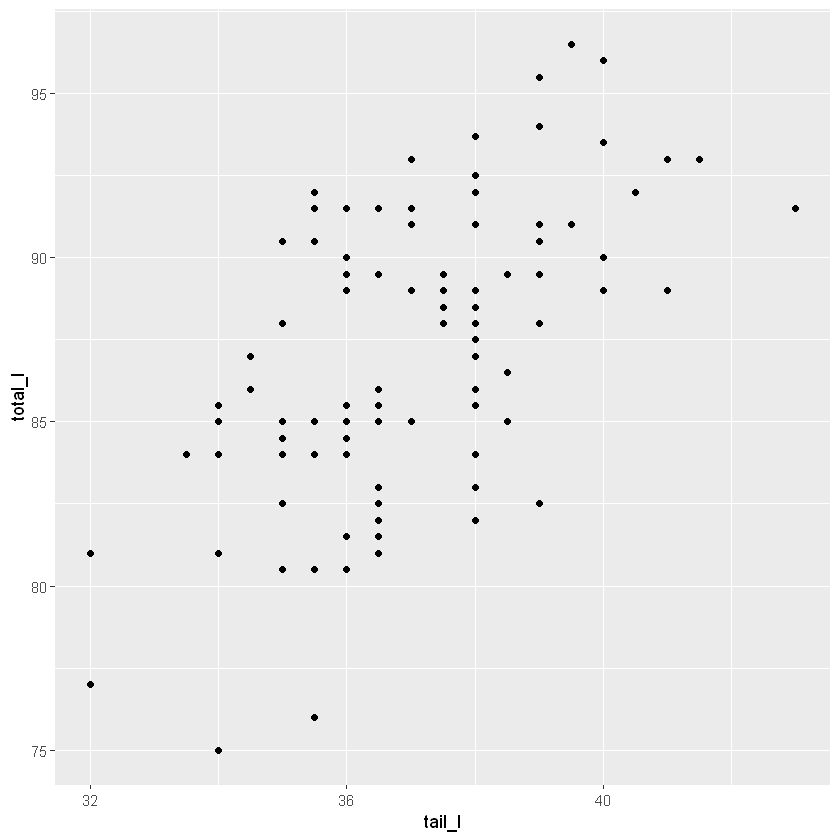

In [11]:
possum %>%
    ggplot(aes(x=tail_l, y=total_l)) +
    geom_point()

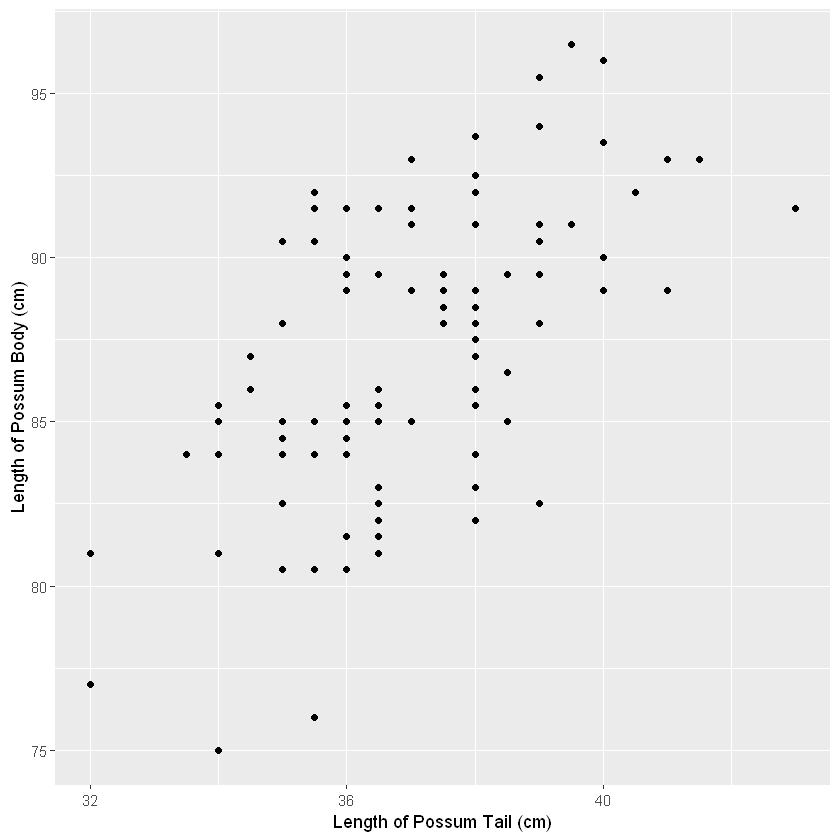

In [12]:
possum %>%
    ggplot(aes(x=tail_l, y=total_l)) +
    geom_point() +
    scale_x_continuous("Length of Possum Tail (cm)") +
    scale_y_continuous("Length of Possum Body (cm)")

- Can think of boxplots as scatterplots......
  - but with discretized explanatory variable
- `cut()` function discretizes 
  - Choose appropriate number of "boxes"

The `cut()` function takes two arguments: the continuous variable you want to discretize and the number of `breaks` that you want to make in that continuous variable in order to discretize it.

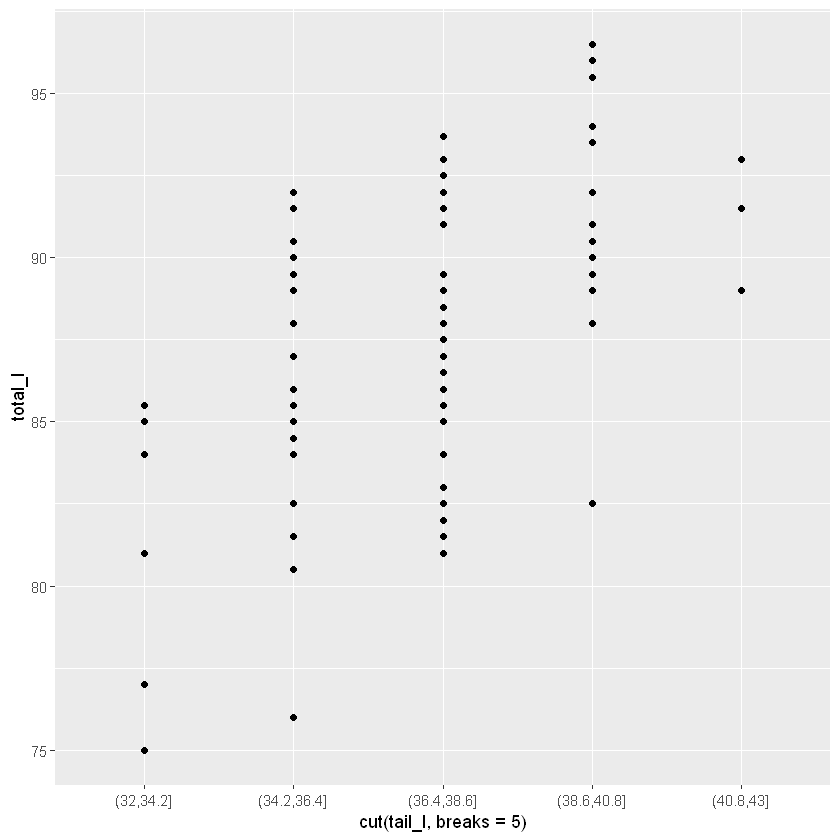

In [13]:
possum %>%
    ggplot(aes(x=cut(tail_l, breaks=5), y=total_l)) +
    geom_point()

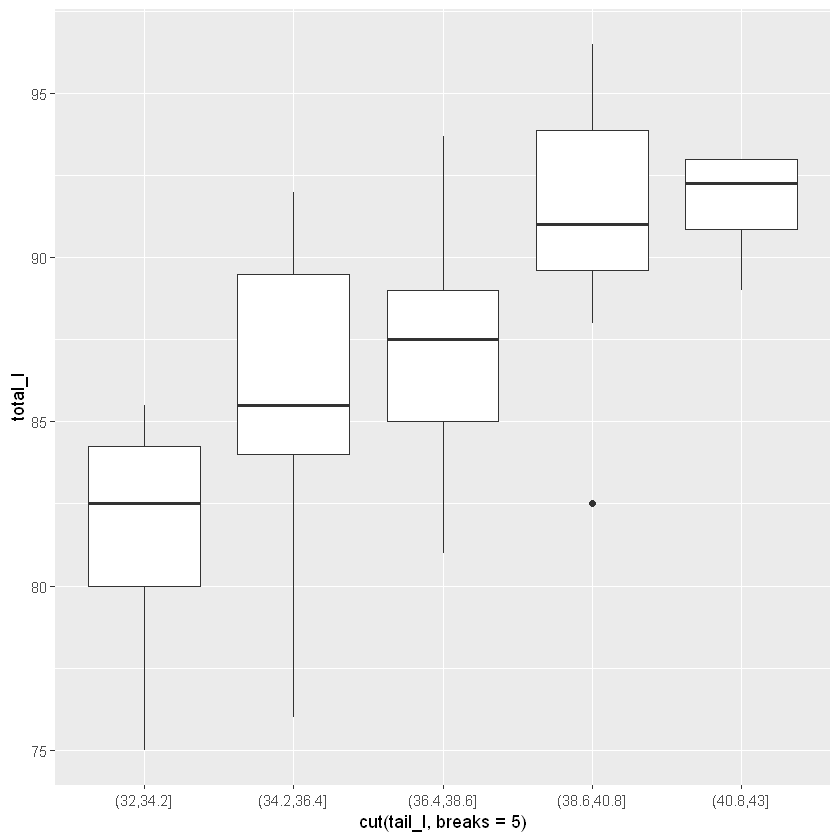

In [14]:
possum %>%
    ggplot(aes(x=cut(tail_l, breaks=5), y=total_l)) +
    geom_boxplot()

### ncbirths

In [15]:
head(ncbirths)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
NA,13,younger mom,39,full term,10,not married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,not married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,not married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,not married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,not married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,not married,22,5.38,low,male,nonsmoker,not white


The `ncbirths` dataset is a random sample of 1,000 cases taken from a larger dataset collected in 2004. Each case describes the birth of a single child born in North Carolina, along with various characteristics of the child (e.g. birth weight, length of gestation, etc.), the child's mother (e.g. age, weight gained during pregnancy, smoking habits, etc.) and the child's father (e.g. age).

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

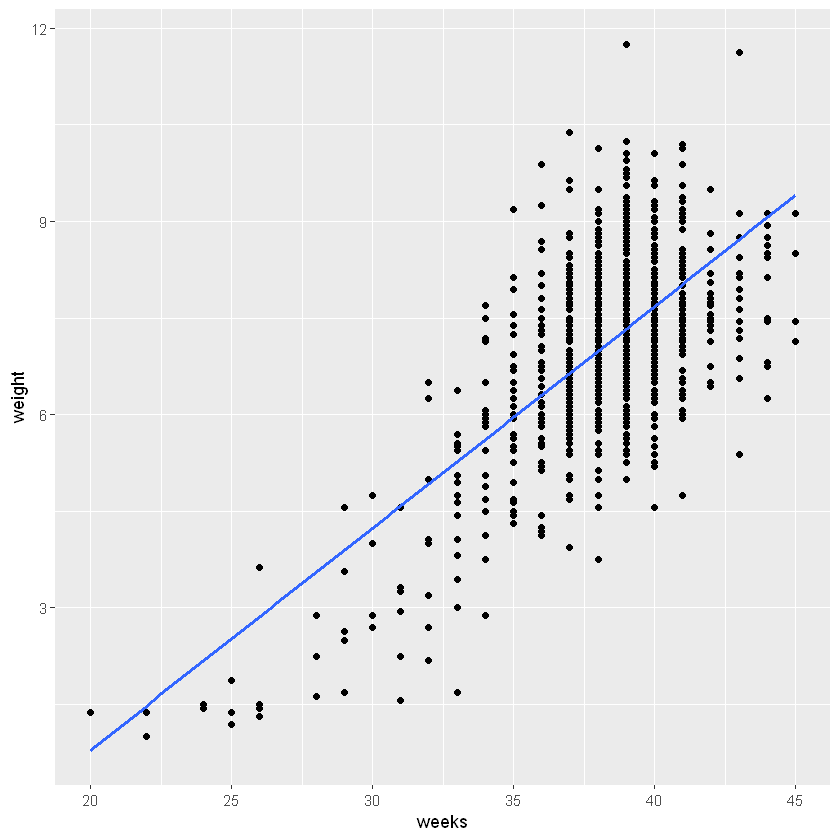

In [17]:
ncbirths %>%
    ggplot(aes(x=weeks, y=weight)) +
    geom_point() +
    geom_smooth(method="lm", se=F)

### Boxplots as discretized/conditioned scatterplots

We you can think of boxplots as scatterplots for which the variable on the x-axis has been discretized.

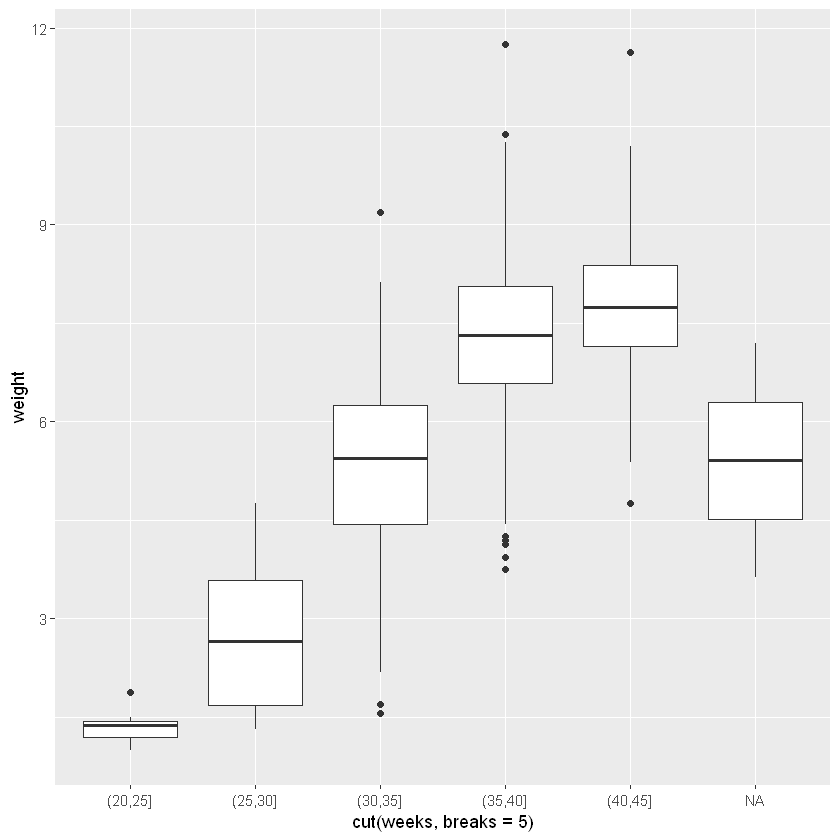

In [19]:
ncbirths %>%
    ggplot(aes(x=cut(weeks, breaks=5), y=weight)) +
    geom_boxplot()

## Characterizing bivariate relationships
- Form(e.g.linear,quadratic,non-linear)
- Direction(e.g.postive,negative)
- Strength(how much scatter/noise?)
- Outliers


### Creating scatterplots

we will be using several datasets listed below. These data are available through the `openintro` package. Briefly:
- The `mammals` dataset contains information about 39 different species of mammals, including their body weight, brain weight, gestation time, and a few other variables.
- The `mlbBat10` dataset contains batting statistics for 1,199 Major League Baseball players during the 2010 season.
- The `bdims` dataset contains body girth and skeletal diameter measurements for 507 physically active individuals.
- The `smoking` dataset contains information on the smoking habits of 1,691 citizens of the United Kingdom.

In [20]:
head(mammals)

species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
Africanelephant,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
ArcticFox,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
Arcticgroundsquirrel,0.920,5.7,NA,NA,16.5,NA,25,5,2,3
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4


how the brain weight of a mammal varies as a function of its body weight.

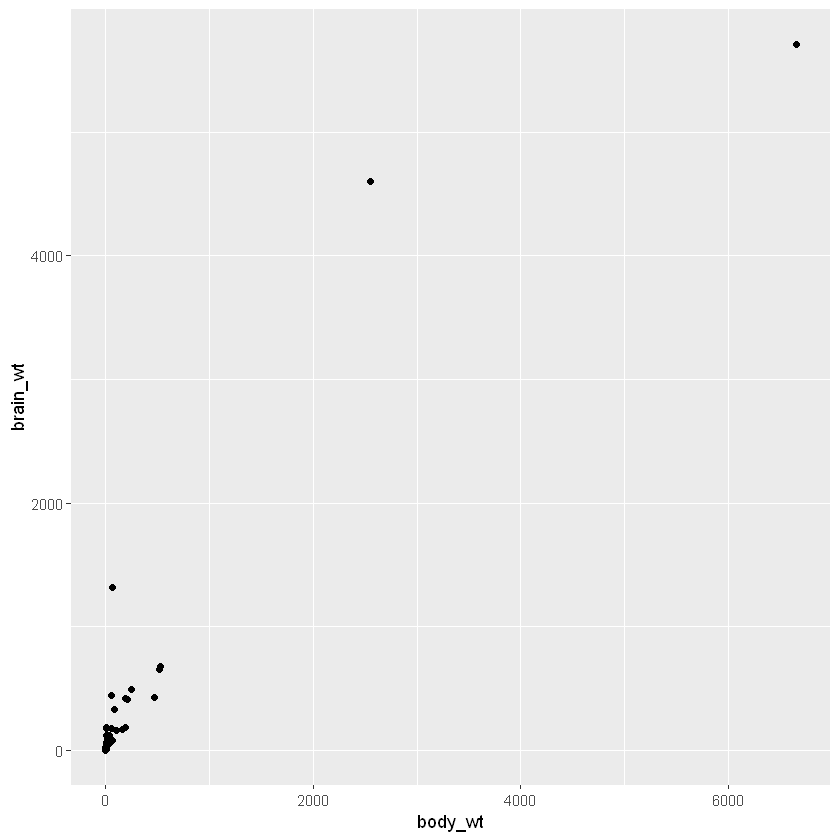

In [21]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) + 
    geom_point()

In [22]:
head(mlbbat10)

name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
M Scutaro,BOS,SS,150,632,92,174,38,0,11,56,245,53,71,5,4,0.333,0.388,0.275


how the slugging percentage (SLG) of a player varies as a function of his on-base percentage (OBP).

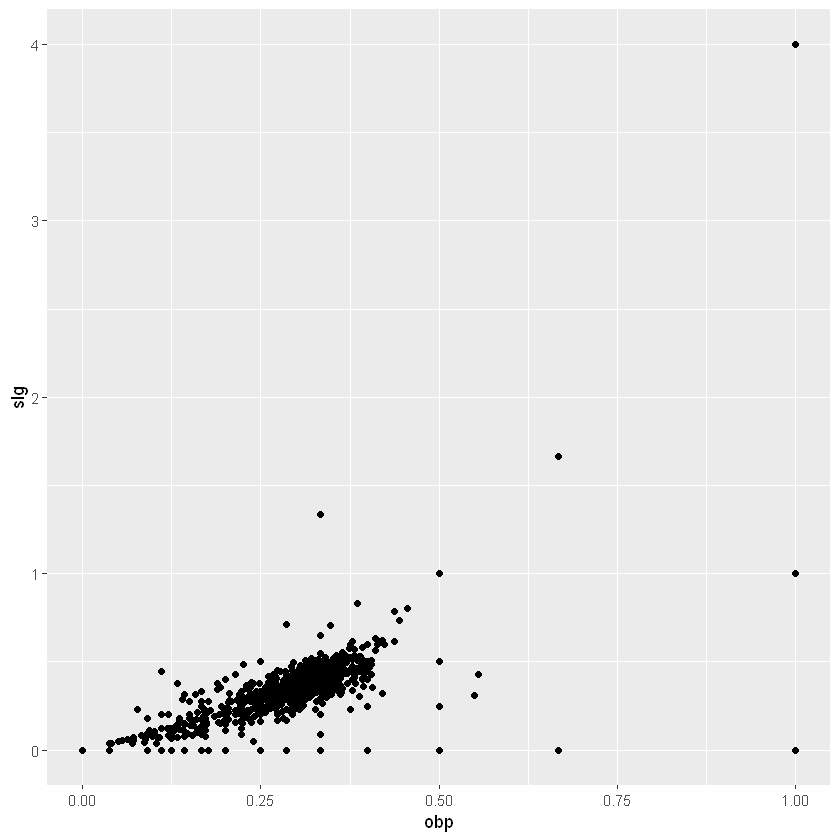

In [24]:
# Baseball player scatterplot
mlbbat10 %>%
  ggplot(aes(y=slg, x=obp)) +
  geom_point()


In [25]:
head(bdims)

bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


how a person's weight varies as a function of their height. We'll use color to separate by sex, which we'll need to coerce to a factor with `factor()`.

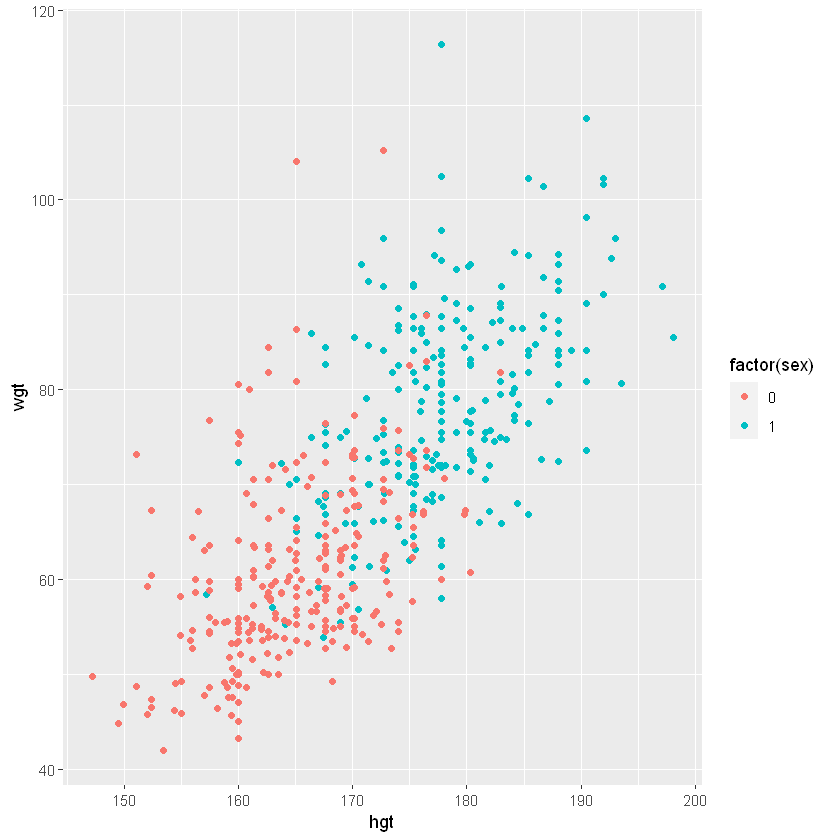

In [26]:
# Body dimensions scatterplot
bdims%>%
  ggplot(aes(x=hgt, y=wgt, color=factor(sex))) +
  geom_point()

In [27]:
head(smoking)

gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NA,NA,
Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12,12,Packets
Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NA,NA,
Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NA,NA,
Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NA,NA,
Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NA,NA,


how the amount that a person smokes on weekdays varies as a function of their age.

Warning message:
"Removed 1270 rows containing missing values (geom_point)."

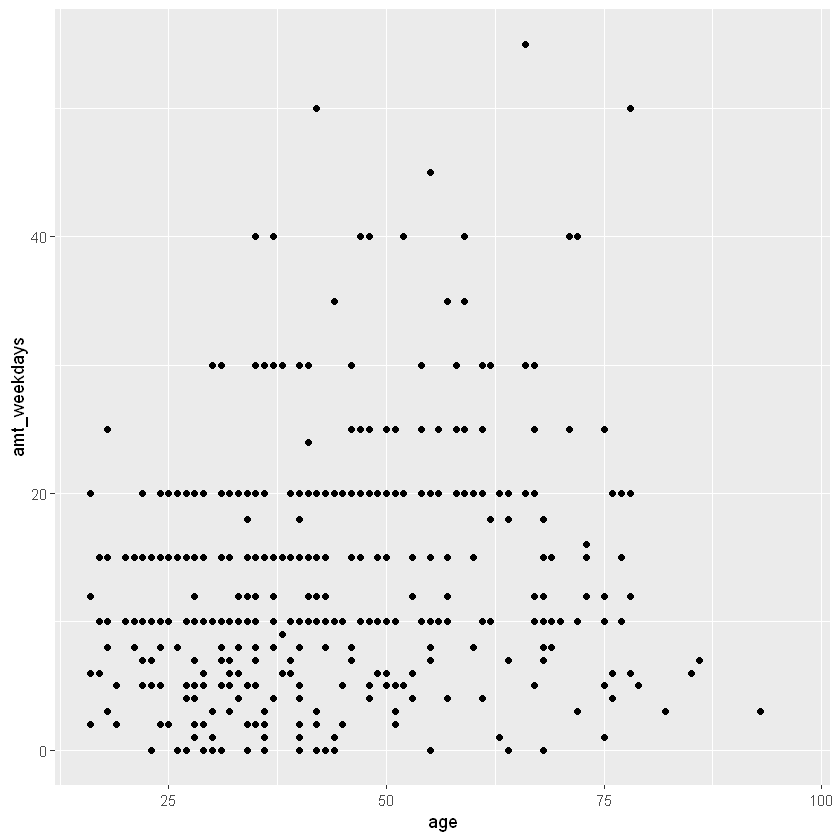

In [28]:
smoking %>%
    ggplot(aes(x=age, y=amt_weekdays)) + 
    geom_point()

In [29]:
head(county)

name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317,none
Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368,partial
Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none
Bullock County,Alabama,11714,10914,10309,-2.28,28.5,76.9,9.9,4.93,no,hs_diploma,15444.16,29655,none


In [31]:
table(county$median_edu)


    below_hs   hs_diploma some_college    bachelors 
           2         1397         1695           46 

### Transformations

The relationship between two variables may not be linear. In these cases we can sometimes see strange and even inscrutable patterns in a scatterplot of the data. Sometimes there really is no meaningful relationship between the two variables. Other times, a careful transformation of one or both of the variables can reveal a clear relationship.

`ggplot2` provides several different mechanisms for viewing transformed relationships. The `coord_trans()` function transforms the coordinates of the plot. Alternatively, the `scale_x_log10()` and `scale_y_log10()` functions perform a base-10 log transformation of each axis.

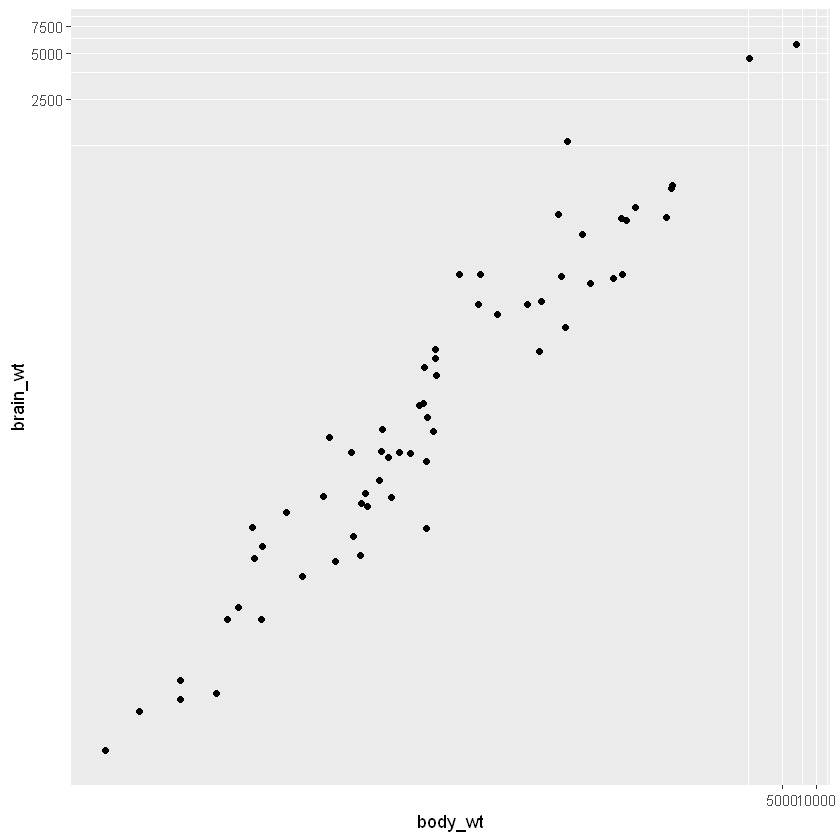

In [32]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) +
    geom_point() +
    coord_trans(x="log10", y="log10")

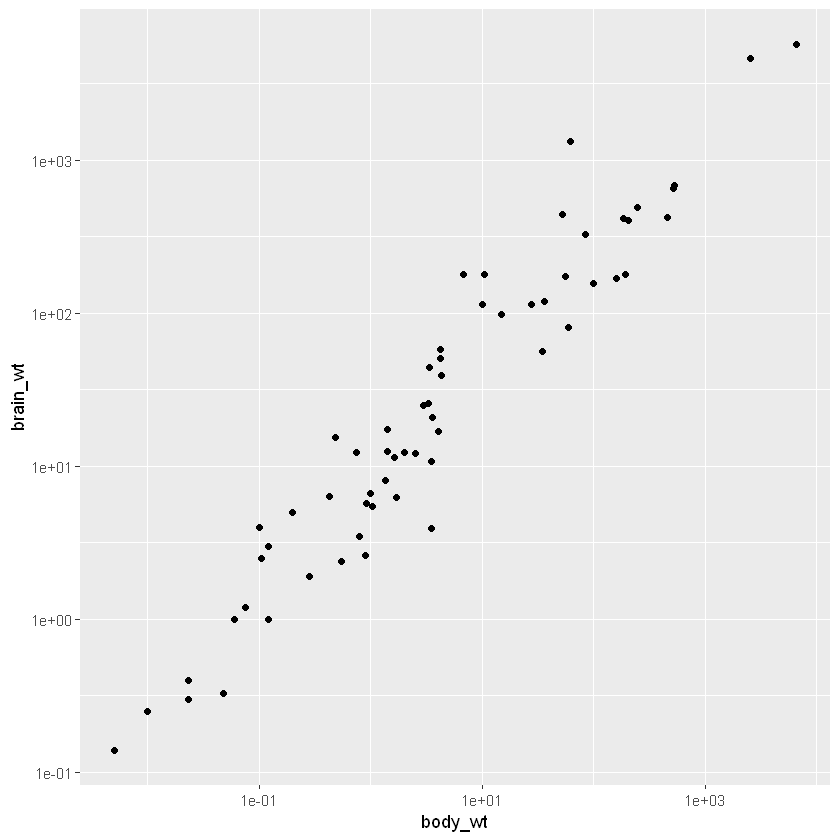

In [33]:
mammals %>%
    ggplot(aes(x=body_wt, y=brain_wt)) +
    geom_point() +
    scale_x_log10() +
    scale_y_log10()

## Outliers


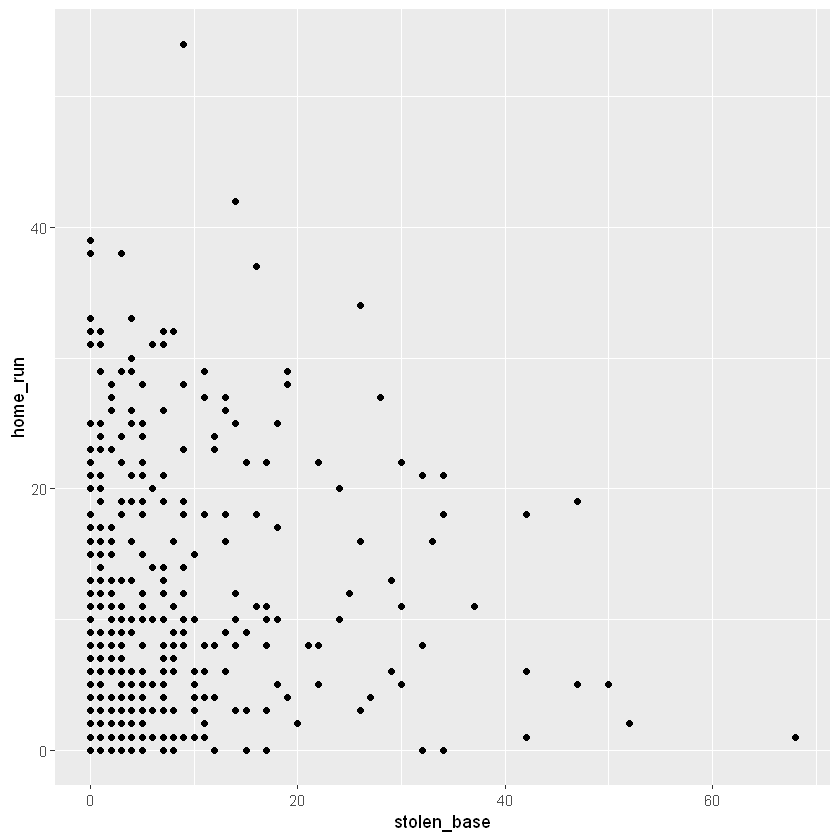

In [36]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point()

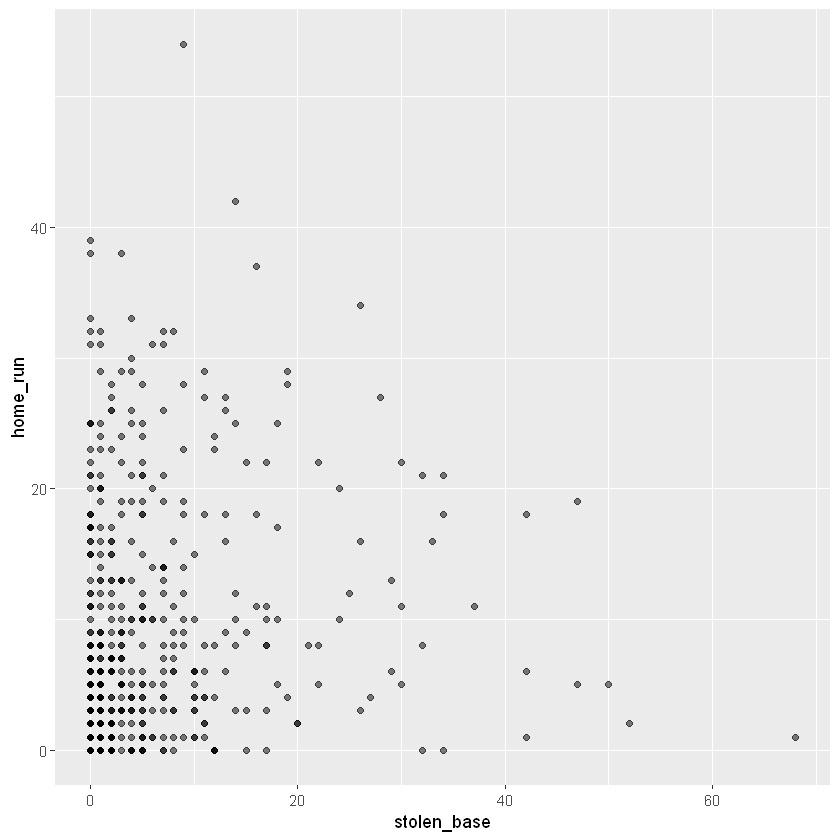

In [37]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point(alpha=.5)

> ### Add some jitter

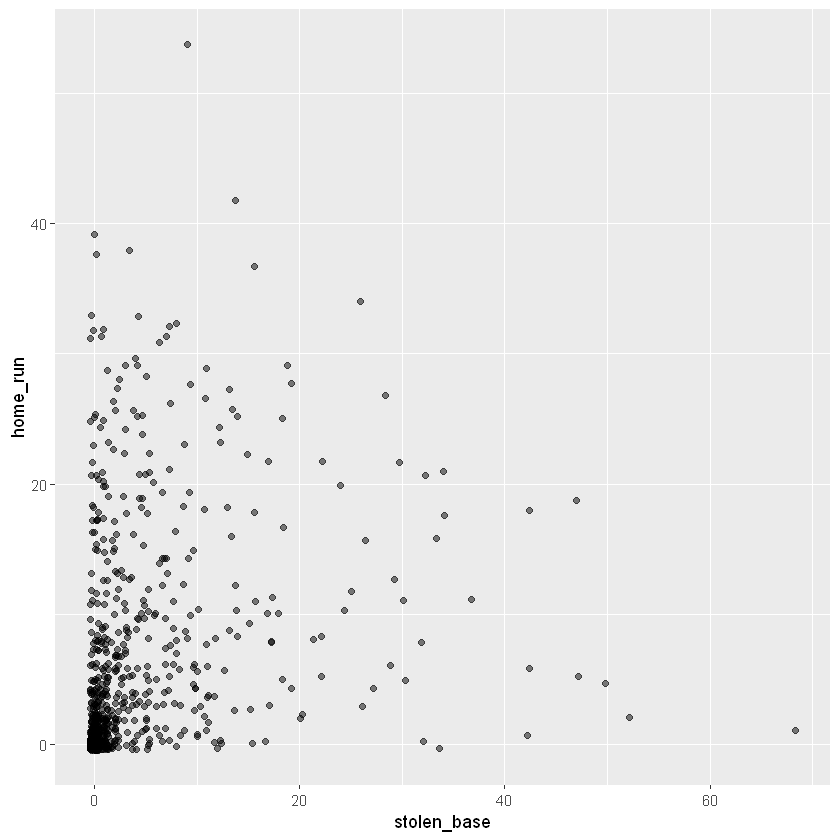

In [38]:
mlbbat10 %>%
    ggplot(aes(x=stolen_base, y=home_run)) +
    geom_point(alpha=.5, position="jitter")

In [39]:
names(mlbbat10)

[1] "name"            "team"            "position"        "game"           
 [5] "at_bat"          "run"             "hit"             "double"         
 [9] "triple"          "home_run"        "rbi"             "total_base"     
[13] "walk"            "strike_out"      "stolen_base"     "caught_stealing"
[17] "obp"             "slg"             "bat_avg"

> ### Identify the outliers

In [40]:
head(
    mlbbat10 %>%
        filter(stolen_base>60 | home_run>50) %>%
            select(name, team, position, stolen_base, home_run)
)

name,team,position,stolen_base,home_run
J Pierre,CWS,OF,68,1
J Bautista,TOR,OF,9,54


### Identifying outliers

in the baseball dataset, most of the points were clustered in the lower left corner of the plot, making it difficult to see the general pattern of the majority of the data. This difficulty was caused by a few outlying players whose on-base percentages (OBPs) were exceptionally high. These values are present in our dataset only because these players had very few batting opportunities.

Both OBP and SLG are known as _rate_ statistics, since they measure the frequency of certain events (as opposed to their count). In order to compare these rates sensibly, it makes sense to include only players with a reasonable number of opportunities, so that these observed rates have the chance to approach their long-run frequencies.

In Major League Baseball, batters qualify for the batting title only if they have 3.1 plate appearances per game. This translates into roughly 502 plate appearances in a 162-game season. The `mlbbat10` dataset does not include plate appearances as a variable, but we can use at-bats (AB) -- which constitute a subset of plate appearances -- as a proxy.

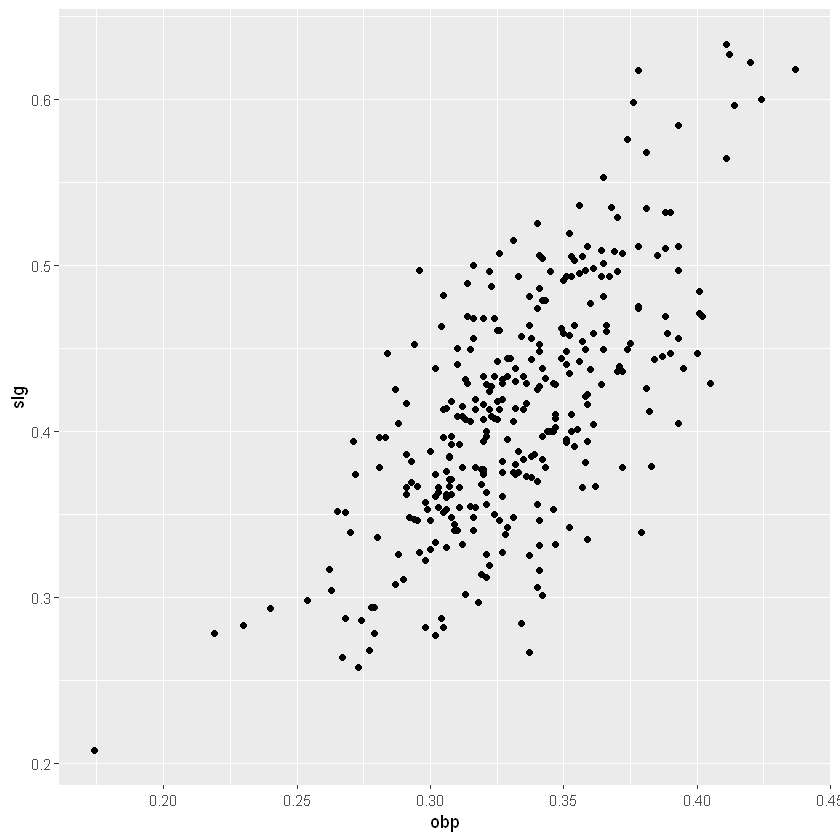

In [41]:
# Filter for AB greater than or equal to 200
ab_gt_200 <- mlbbat10 %>%
  filter(at_bat>=200) 

# Scatterplot of SLG vs. OBP
ggplot(ab_gt_200, aes(x = obp, y = slg)) +
  geom_point()

In [42]:
# Identify the outlying player
ab_gt_200 %>%
  filter(obp<.2)

name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
B Wood,LAA,3B,81,226,20,33,2,0,4,14,47,6,71,1,0,0.174,0.208,0.146


# Correlation

Correlation as a means of quantifying bivariate relationships.

### Quantifying the strength of bivariate relationships

> ### Correlation
- Correlation coefcient between -1 and 1
- Sign —> direction
- Magnitude —> strength

> ### Non-linear correlation

In [43]:
head(run09)

place,time,net_time,pace,age,gender,first,last,city,state,country,div,div_place,div_tot
1,53.533,53.533,5.367,21,F,Lineth,Chepkurui,Kenya,NR,KEN,2,1,953
2,53.917,53.917,5.400,21,F,Belianesh Zemed,Gebre,Ethiopia,NR,ETH,2,2,953
3,53.967,53.967,5.400,22,F,Teyba,Naser,Ethiopia,NR,ETH,2,3,953
4,54.433,54.433,5.450,19,F,Abebu,Gelan,Ethiopia,NR,ETH,1,1,71
5,54.450,54.450,5.450,36,F,Catherine,Ndereba,Kenya,NR,KEN,5,1,1130
6,54.533,54.533,5.467,28,F,Olga,Romanova,Russia,NR,RUS,3,1,2706


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


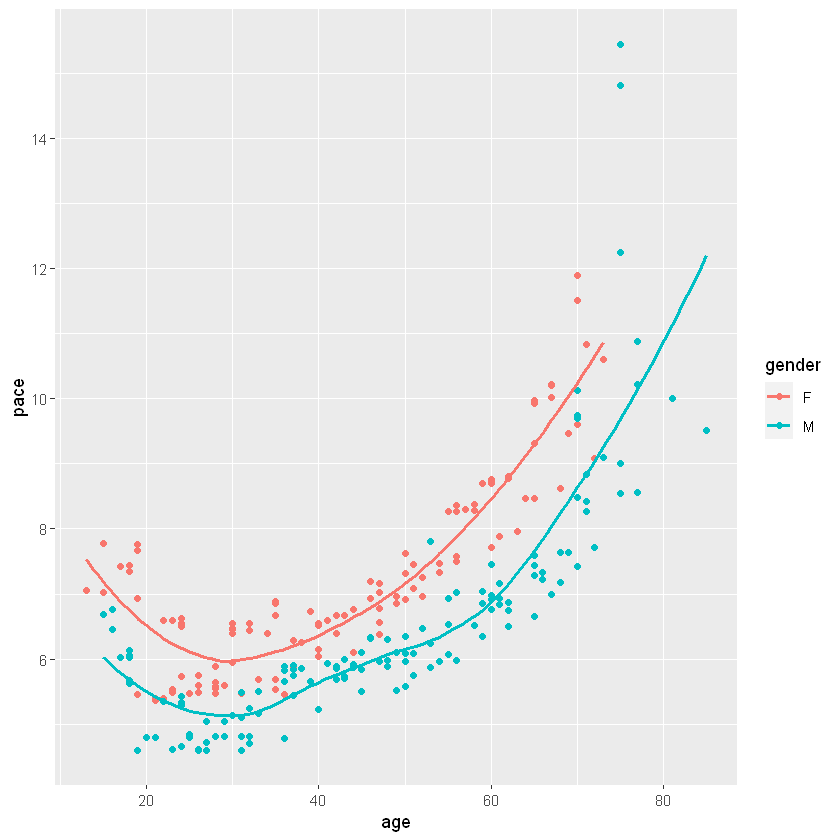

In [44]:
run09 %>%
    filter(div_place <= 10) %>%
        ggplot(aes(x=age, y=pace, color=gender)) +
        geom_point() +
        geom_smooth(se=F)

> ### Pearson product-moment correlation
$$
\begin{split}
r(x,y)&=\frac{Cov(x,y)}{\sqrt{SXX.SYY}}\\
&=\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2.(y_i - \bar{y})^2}}
\end{split}
$$
Correlation coefficients cannot be greater than 1.

### Computing correlation

The `cor(x, y)` function will compute the Pearson product-moment correlation between variables, `x` and `y`. Since this quantity is symmetric with respect to `x` and `y`, it doesn't matter in which order you put the variables.

At the same time, the `cor()` function is very conservative when it encounters missing data (e.g. NAs). The `use` argument allows you to override the default behavior of returning NA whenever any of the values encountered is NA. Setting the use argument to `"pairwise.complete.obs"` allows `cor()` to compute the correlation coefficient for those observations where the values of `x` and `y` are both not missing.

In [46]:
# Compute correlation
ncbirths %>%
  summarize(N = n(), r = cor(mage, weight))

N,r
1000,0.05506589


In [47]:
# Compute correlation for all non-missing pairs
ncbirths %>%
  summarize(N = n(), r = cor(weeks, weight, use = "pairwise.complete.obs"))

N,r
1000,0.6701013


## The Anscombe dataset


In [48]:
head(anscombe)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04


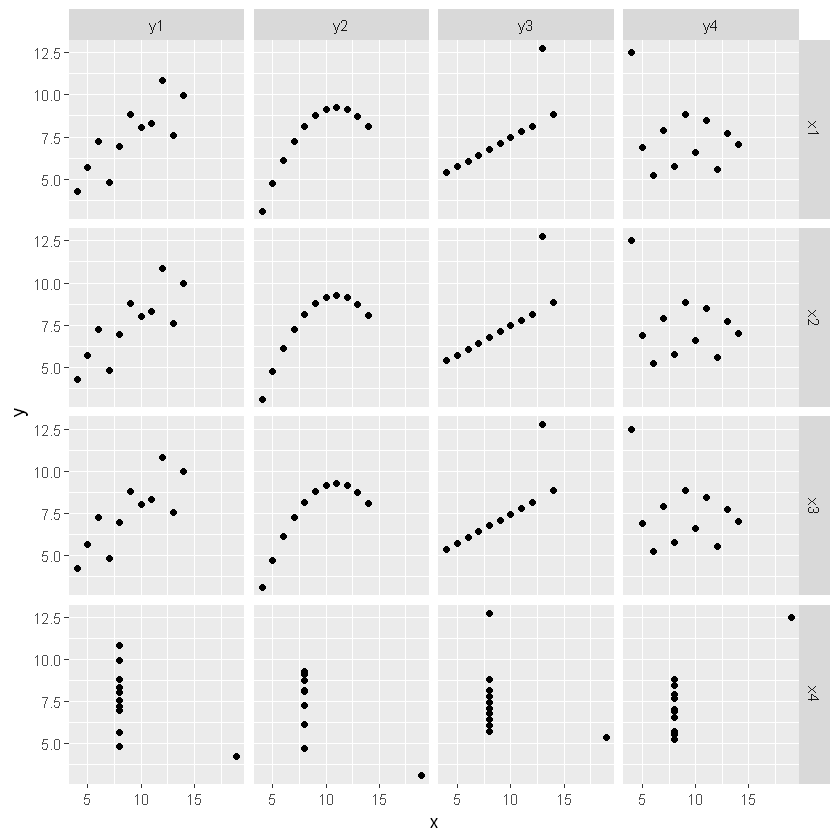

In [56]:
anscombe %>%
    gather(x_name, x, x1:x4) %>%
        gather(y_name, y, y1:y4) %>%
            ggplot(aes(x=x, y=y)) +
            geom_point() +
            facet_grid(x_name~y_name)